In [2]:
import pandas as pd
import shap
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.neural_network import MLPClassifier , MLPRegressor
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score , classification_report, precision_score, recall_score, f1_score ,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LogisticRegression , LinearRegression, Ridge, Lasso , ElasticNet
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier , ExtraTreeClassifier ,ExtraTreeRegressor
from sklearn.ensemble import RandomForestClassifier , HistGradientBoostingClassifier ,HistGradientBoostingRegressor ,GradientBoostingClassifier ,VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler , LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE ,mutual_info_regression
from sklearn.feature_selection import SelectKBest, chi2 , f_regression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV ,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

#from catboost import CatBoostRegressor



In [3]:
df1=pd.read_excel(r"C:\Users\Yatharth_Shivam\OneDrive\Desktop\CREDIT RISK\External_Cibil_Dataset.xlsx")
df1

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


In [4]:
df2=pd.read_excel(r"C:\Users\Yatharth_Shivam\OneDrive\Desktop\CREDIT RISK\Internal_Bank_Dataset.xlsx")
df2

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.00,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.00,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.00,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.00,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.00,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,3,0,3,1,0,0.333,0.00,1.000,0.000,...,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.500,0.500,...,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.500,0.500,...,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.500,0.500,...,0,2,0,0,0,0,2,0,15,8


In [5]:
unseen_df=pd.read_excel(r"C:\Users\Yatharth_Shivam\OneDrive\Desktop\CREDIT RISK\Unseen_Dataset.xlsx")
unseen_df

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.0,0,0.000,0,0,0,1,1,5,...,1,0.000,0.0,0,0,Married,GRADUATE,M,ConsumerLoan,others
96,0.222,0.0,2,0.222,0,0,0,0,1,8,...,0,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,others
97,0.000,0.0,0,0.000,0,0,0,0,1,0,...,0,0.000,0.0,0,0,Married,SSC,M,others,others
98,0.000,1.0,1,1.000,0,0,0,0,1,0,...,0,0.000,0.0,0,0,Married,12TH,M,others,others


In [6]:
# Merge datasets on Prospect_ID
merged_df = df1.merge(df2, on='PROSPECTID', how='inner')
merged_df6=merged_df.copy()

In [7]:
# Merge datasets on Prospect_ID
merged_df2 = df1.merge(df2, on='PROSPECTID', how='inner')
merged_df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [8]:
merged_df5=merged_df.copy()
merged_df5

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [9]:
merged_df4=merged_df5.copy()

In [9]:
merged_df['Credit_Score'].isnull().sum()

0

In [10]:
# Handle missing values (-99999 as NaN, drop cols with >35% missing)
merged_df.replace(-99999, np.nan, inplace=True)
unseen_df.replace(-99999, np.nan, inplace=True)
# Fill remaining NaN values
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)
    else:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)

for col in unseen_df.columns:
    if unseen_df[col].dtype == 'object':
        unseen_df[col].fillna(unseen_df[col].mode()[0], inplace=True)
    else:
        unseen_df[col].fillna(unseen_df[col].median(), inplace=True)


C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_19108\4005769346.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].median(), inplace=True)
C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_19108\4005769346.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [11]:
merged_df['Credit_Score'].isnull().sum()

0

In [12]:

merged_df.dropna(thresh=0.65 * len(merged_df), axis=1, inplace=True)
merged_df.dropna(inplace=True)
unseen_df.dropna(inplace=True)

In [13]:
merged_df['Credit_Score']

0        696
1        685
2        693
3        673
4        753
        ... 
51331    650
51332    702
51333    661
51334    686
51335    681
Name: Credit_Score, Length: 51336, dtype: int64

In [14]:
unseen_df

,pct_tl_open_L6M,pct_tl_closed_L6M,Tot_TL_closed_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,...,PL_Flag,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2
0,0.000,0.0,0,0.000,0,0,0,4,1,4,...,1,0.000,0.0,1,0,Married,12TH,M,PL,PL
1,0.000,0.0,0,0.000,0,0,0,0,0,1,...,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan
2,0.125,0.0,0,0.000,1,0,0,0,2,6,...,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others
3,0.000,0.0,0,0.000,0,0,0,0,3,0,...,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL
4,0.000,0.0,1,0.167,0,0,0,0,6,0,...,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000,0.0,0,0.000,0,0,0,1,1,5,...,1,0.000,0.0,0,0,Married,GRADUATE,M,ConsumerLoan,others
96,0.222,0.0,2,0.222,0,0,0,0,1,8,...,0,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,others
97,0.000,0.0,0,0.000,0,0,0,0,1,0,...,0,0.000,0.0,0,0,Married,SSC,M,others,others
98,0.000,1.0,1,1.000,0,0,0,0,1,0,...,0,0.000,0.0,0,0,Married,12TH,M,others,others


In [15]:
merged_df['Credit_Score'].isnull().sum()


0

In [15]:
imp_col=[]
ex_col=[]
for col in merged_df.columns:
    if col in unseen_df.columns :
        imp_col.append(col)
    else:
        ex_col.append(col)


ex_col

['PROSPECTID',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'num_times_delinquent',
 'max_delinquency_level',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'num_times_30p_dpd',
 'num_std',
 'num_std_6mts',
 'num_dbt_6mts',
 'num_lss_6mts',
 'num_lss_12mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'PL_enq',
 'PL_enq_L6m',
 'enq_L12m',
 'enq_L6m',
 'AGE',
 'pct_of_active_TLs_ever',
 'pct_opened_TLs_L6m_of_L12m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'PL_utilization',
 'pct_PL_enq_L6m_of_L12m',
 'pct_CC_enq_L6m_of_L12m',
 'max_unsec_exposure_inPct',
 'Credit_Score',
 'Approved_Flag',
 'Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'pct_tl_open_L12M',
 'Auto_TL',
 'Consumer_TL',
 'Gold_TL']

In [16]:
merged_df3=merged_df.copy()
merged_df3['Credit_Score'].isnull().sum()

np.int64(0)

In [17]:
cs=merged_df3['Credit_Score']
cs

0        696
1        685
2        693
3        673
4        753
        ... 
51331    650
51332    702
51333    661
51334    686
51335    681
Name: Credit_Score, Length: 51336, dtype: int64

In [18]:
merged_df.drop(ex_col, axis=1, inplace=True)
merged_df

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,pct_tl_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,549.0,29,0,0,11,0,0,0,0,0,...,0.00,0,0,0,4,1,4,0,72.0,18.0
1,47.0,0,0,0,0,0,0,0,0,0,...,0.00,0,0,0,0,0,1,0,7.0,7.0
2,302.0,25,8,0,10,0,0,0,0,0,...,0.00,1,0,0,0,2,6,0,47.0,2.0
3,74.0,0,0,0,5,0,0,0,0,0,...,0.00,1,0,0,0,0,1,1,5.0,5.0
4,583.0,0,0,0,16,0,0,0,0,0,...,0.00,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24,0,0,0,0,0,0,0,0,...,0.00,0,0,0,0,0,3,1,24.0,5.0
51332,57.0,0,0,0,6,0,0,0,0,0,...,0.25,0,0,0,0,2,2,0,74.0,7.0
51333,32.0,0,0,0,0,0,0,0,0,0,...,0.50,0,0,0,0,0,2,0,9.0,5.0
51334,58.0,0,0,0,0,0,0,0,0,0,...,0.50,0,0,0,0,0,2,0,15.0,8.0


In [19]:
merged_df=pd.concat([merged_df,cs], axis=1).reset_index(drop=True)
merged_df

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Credit_Score
0,549.0,29,0,0,11,0,0,0,0,0,...,0,0,0,4,1,4,0,72.0,18.0,696
1,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7.0,7.0,685
2,302.0,25,8,0,10,0,0,0,0,0,...,1,0,0,0,2,6,0,47.0,2.0,693
3,74.0,0,0,0,5,0,0,0,0,0,...,1,0,0,0,0,1,1,5.0,5.0,673
4,583.0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,3,0,2,131.0,32.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,24.0,5.0,650
51332,57.0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,2,2,0,74.0,7.0,702
51333,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,9.0,5.0,661
51334,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,15.0,8.0,686


In [20]:
merged_df.drop_duplicates(inplace=True)

In [21]:
merged_df

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Credit_Score
0,549.0,29,0,0,11,0,0,0,0,0,...,0,0,0,4,1,4,0,72.0,18.0,696
1,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7.0,7.0,685
2,302.0,25,8,0,10,0,0,0,0,0,...,1,0,0,0,2,6,0,47.0,2.0,693
3,74.0,0,0,0,5,0,0,0,0,0,...,1,0,0,0,0,1,1,5.0,5.0,673
4,583.0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,3,0,2,131.0,32.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,24.0,5.0,650
51332,57.0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,2,2,0,74.0,7.0,702
51333,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,9.0,5.0,661
51334,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,15.0,8.0,686


In [22]:
merged_df4=merged_df.copy()
merged_df4

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Credit_Score
0,549.0,29,0,0,11,0,0,0,0,0,...,0,0,0,4,1,4,0,72.0,18.0,696
1,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7.0,7.0,685
2,302.0,25,8,0,10,0,0,0,0,0,...,1,0,0,0,2,6,0,47.0,2.0,693
3,74.0,0,0,0,5,0,0,0,0,0,...,1,0,0,0,0,1,1,5.0,5.0,673
4,583.0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,3,0,2,131.0,32.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,24.0,5.0,650
51332,57.0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,2,2,0,74.0,7.0,702
51333,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,9.0,5.0,661
51334,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,15.0,8.0,686


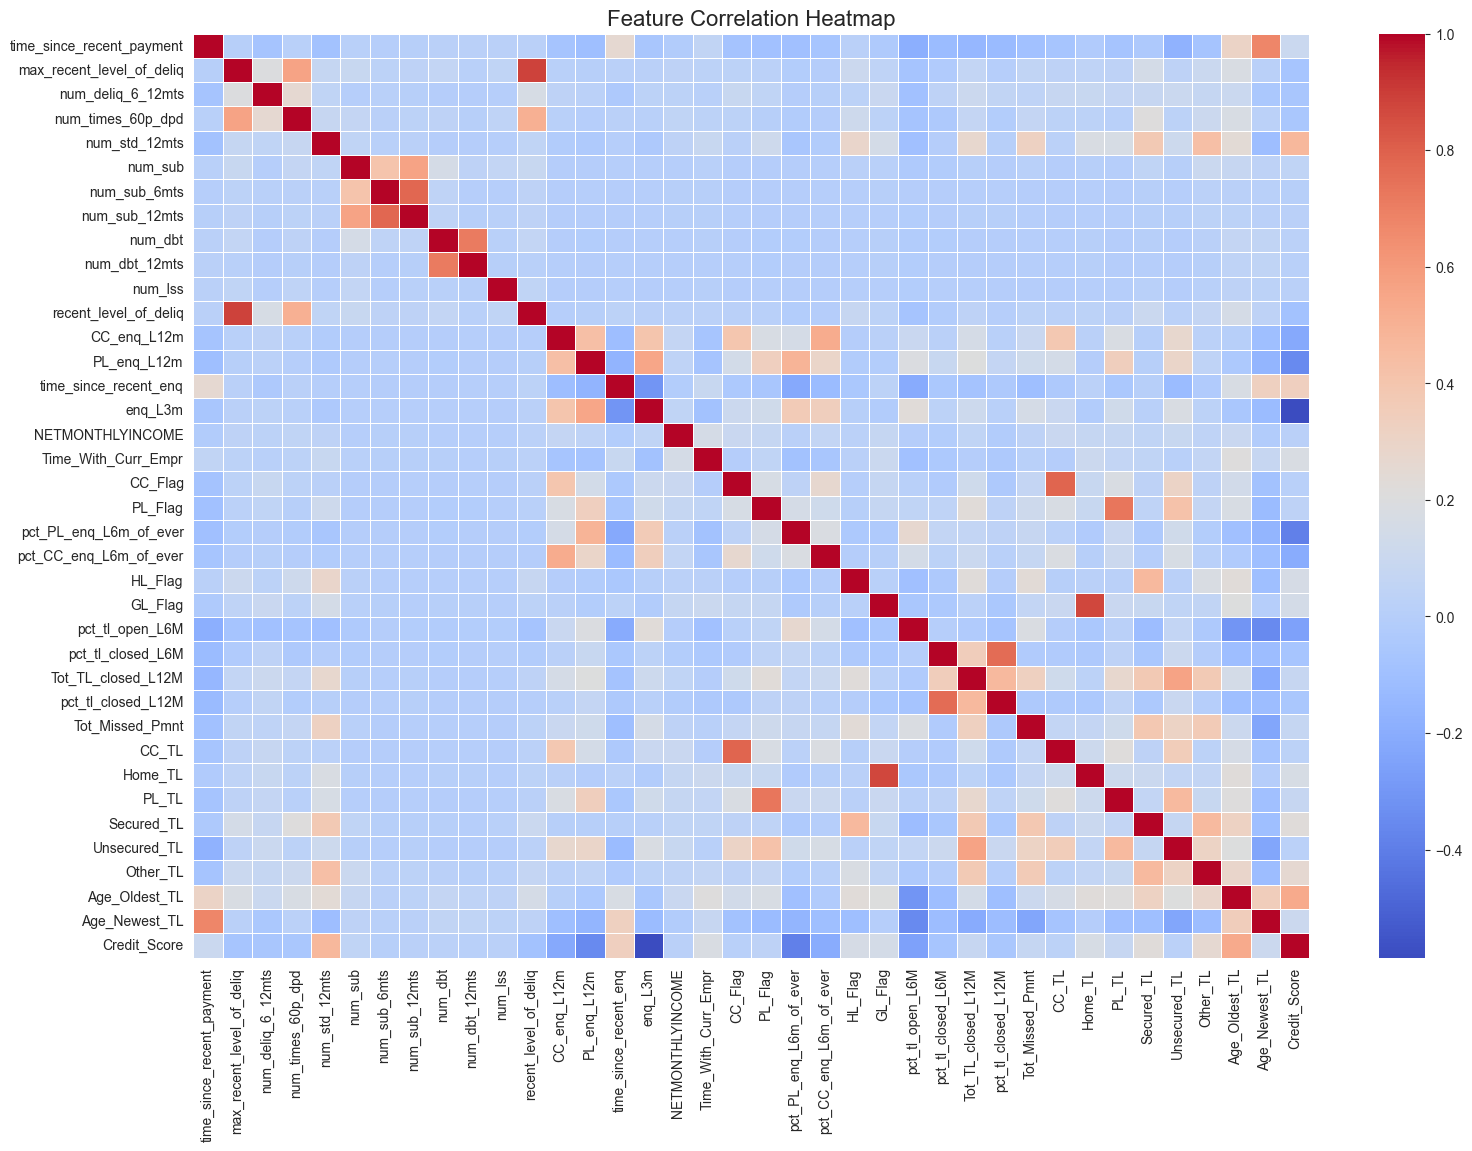

In [23]:
# Set figure size for better readability
plt.figure(figsize=(18, 12))

# Compute the correlation matrix
correlation_matrix = merged_df.corr(numeric_only=True)

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [24]:
correlation_matrix

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Credit_Score
time_since_recent_payment,1.000000,0.005329,-0.074167,0.012936,-0.089190,0.014852,0.001850,0.005991,0.017616,0.021231,...,-0.093418,-0.069612,-0.027584,-0.074913,-0.034431,-0.172272,-0.072391,0.303419,0.675671,0.101958
max_recent_level_of_deliq,0.005329,1.000000,0.195789,0.562997,0.072863,0.088983,0.029918,0.036774,0.062573,0.011470,...,0.058192,0.036796,0.041513,0.034458,0.150287,0.038407,0.097058,0.180157,0.020610,-0.066512
num_deliq_6_12mts,-0.074167,0.195789,1.000000,0.259243,0.048048,0.001823,0.013717,0.008793,-0.006414,-0.004485,...,0.041704,0.082478,0.088740,0.069360,0.080327,0.098221,0.075305,0.097782,-0.047467,-0.062014
num_times_60p_dpd,0.012936,0.562997,0.259243,1.000000,0.082638,0.065842,0.018120,0.029324,0.036392,0.003581,...,0.065112,0.031864,0.030091,0.009329,0.208237,0.027983,0.107848,0.170317,0.027633,-0.053894
num_std_12mts,-0.089190,0.072863,0.048048,0.082638,1.000000,0.050730,0.010691,0.020921,-0.007592,-0.008134,...,0.319391,0.022450,0.178862,0.169110,0.379625,0.108329,0.431082,0.242930,-0.112601,0.470303
num_sub,0.014852,0.088983,0.001823,0.065842,0.050730,1.000000,0.408702,0.560847,0.152720,0.039698,...,0.009690,-0.006975,0.008660,0.001882,0.049700,0.008020,0.097024,0.078917,0.037068,0.047607
num_sub_6mts,0.001850,0.029918,0.013717,0.018120,0.010691,0.408702,1.000000,0.777070,0.046200,0.002943,...,-0.004584,-0.004060,0.002021,-0.007033,0.003941,0.002485,0.023524,0.017837,0.010405,0.008885
num_sub_12mts,0.005991,0.036774,0.008793,0.029324,0.020921,0.560847,0.777070,1.000000,0.046039,0.008365,...,-0.002368,-0.003571,0.001357,-0.001533,0.007028,0.003144,0.029455,0.028967,0.016252,0.017045
num_dbt,0.017616,0.062573,-0.006414,0.036392,-0.007592,0.152720,0.046200,0.046039,1.000000,0.713947,...,-0.002464,-0.003123,0.006884,-0.006939,0.008969,-0.004880,0.019300,0.067017,0.055949,0.026608
num_dbt_12mts,0.021231,0.011470,-0.004485,0.003581,-0.008134,0.039698,0.002943,0.008365,0.713947,1.000000,...,-0.000191,0.000322,0.008301,-0.005791,-0.001332,-0.003586,0.007255,0.042528,0.046614,0.014281


In [25]:
merged_df.columns

Index(['time_since_recent_payment', 'max_recent_level_of_deliq',
       'num_deliq_6_12mts', 'num_times_60p_dpd', 'num_std_12mts', 'num_sub',
       'num_sub_6mts', 'num_sub_12mts', 'num_dbt', 'num_dbt_12mts', 'num_lss',
       'recent_level_of_deliq', 'CC_enq_L12m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L3m', 'MARITALSTATUS', 'EDUCATION',
       'GENDER', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'CC_Flag',
       'PL_Flag', 'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever',
       'HL_Flag', 'GL_Flag', 'last_prod_enq2', 'first_prod_enq2',
       'pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'Credit_Score'],
      dtype='object')

In [26]:
numerical_cols = merged_df.select_dtypes(include=["number"]).columns
categorical_cols = merged_df.select_dtypes(include=["object"]).columns

In [27]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name}:\n  R² Score: {r2:.4f}\n  MSE: {mse:.4f}\n  MAE: {mae:.4f}\n")

numerical_cols

In [28]:
merged_df

,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,...,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Credit_Score
0,549.0,29,0,0,11,0,0,0,0,0,...,0,0,0,4,1,4,0,72.0,18.0,696
1,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,7.0,7.0,685
2,302.0,25,8,0,10,0,0,0,0,0,...,1,0,0,0,2,6,0,47.0,2.0,693
3,74.0,0,0,0,5,0,0,0,0,0,...,1,0,0,0,0,1,1,5.0,5.0,673
4,583.0,0,0,0,16,0,0,0,0,0,...,0,0,0,0,3,0,2,131.0,32.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,1,24.0,5.0,650
51332,57.0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,2,2,0,74.0,7.0,702
51333,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,9.0,5.0,661
51334,58.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,15.0,8.0,686


USING OHE  , StandardScaler  AND MODELS (REGRESSION) (CREDIT SCORE ISN('T PRESENT IN THE UNSEEN DATASET HENCE MADE A DISTRIBUTION GRAPH TO PREDICT) (ONLY 43 FEATURES FIXED HYPER PARAMS')

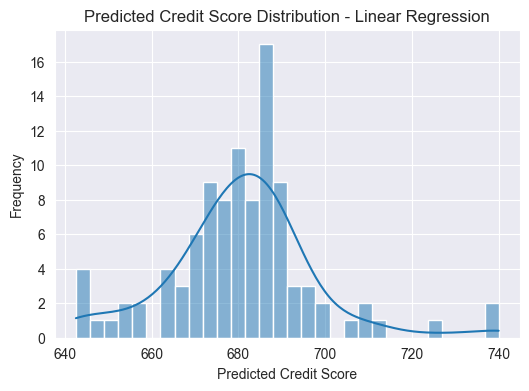

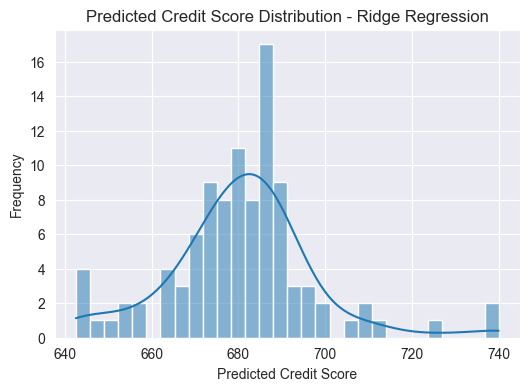

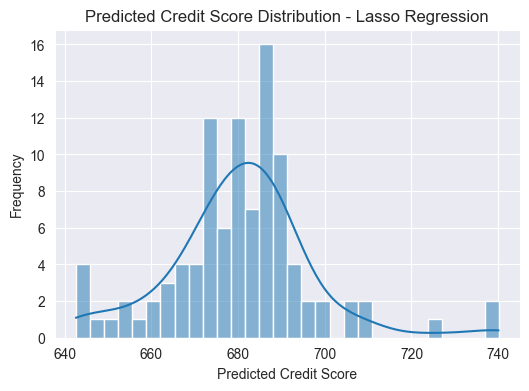

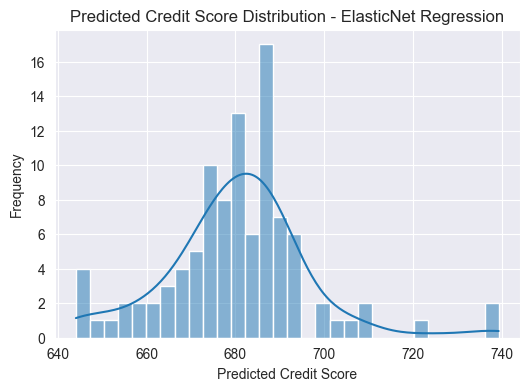

In [29]:

# Define target variable
target_col = 'Credit_Score'
X = merged_df.drop(columns=[target_col])  # Features
y = merged_df[target_col]  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols =  ['MARITALSTATUS', 'EDUCATION', 'GENDER','last_prod_enq2','first_prod_enq2']  # Adjust as needed
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# One-Hot Encoding (OHE)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[categorical_cols])

X_train_categorical = pd.DataFrame(ohe.transform(X_train[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))
X_test_categorical = pd.DataFrame(ohe.transform(X_test[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))

# Merge encoded categorical features with numerical features
X_train_processed = pd.concat([X_train[numerical_cols].reset_index(drop=True), X_train_categorical], axis=1)
X_test_processed = pd.concat([X_test[numerical_cols].reset_index(drop=True), X_test_categorical], axis=1)

# Convert numerical columns to correct dtype
X_train_processed[numerical_cols] = X_train_processed[numerical_cols].apply(pd.to_numeric, errors='coerce')
X_test_processed[numerical_cols] = X_test_processed[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=50000)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

# Preprocess unseen dataset
unseen_categorical = pd.DataFrame(ohe.transform(unseen_df[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))
unseen_numerical = unseen_df[numerical_cols].reset_index(drop=True)

# Ensure unseen numerical data is numeric
unseen_numerical = unseen_numerical.apply(pd.to_numeric, errors='coerce')

unseen_processed = pd.concat([unseen_numerical, unseen_categorical], axis=1)
unseen_scaled = scaler.transform(unseen_processed)

# Predict Credit Score on unseen dataset
unseen_predictions = {}
for name, model in trained_models.items():
    unseen_predictions[name] = model.predict(unseen_scaled)

# Analyze predictions
for name, preds in unseen_predictions.items():
    plt.figure(figsize=(6, 4))
    sns.histplot(preds, bins=30, kde=True)
    plt.title(f"Predicted Credit Score Distribution - {name}")
    plt.xlabel("Predicted Credit Score")
    plt.ylabel("Frequency")
    plt.show()


USING OHE, StandardScaler,  RFE, SELECTKBEST AND MODELS (REGRESSION) (MERGED DATASET IS USED) (ONLY 43 FEATURES and Fixed Hyperparams )

In [30]:
# Define target variable
target_col = 'Credit_Score'
X = merged_df.drop(columns=[target_col])  # Features
y = merged_df[target_col]  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = ['MARITALSTATUS', 'EDUCATION', 'GENDER','last_prod_enq2','first_prod_enq2']  # Adjust as needed
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

# One-Hot Encoding (OHE)
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(X_train[categorical_cols])

X_train_categorical = pd.DataFrame(ohe.transform(X_train[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))
X_test_categorical = pd.DataFrame(ohe.transform(X_test[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))

# Merge encoded categorical features with numerical features
X_train_processed = pd.concat([X_train[numerical_cols].reset_index(drop=True), X_train_categorical], axis=1)
X_test_processed = pd.concat([X_test[numerical_cols].reset_index(drop=True), X_test_categorical], axis=1)

# Convert numerical columns to correct dtype
X_train_processed[numerical_cols] = X_train_processed[numerical_cols].apply(pd.to_numeric, errors='coerce')
X_test_processed[numerical_cols] = X_test_processed[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Feature Selection
k_best = SelectKBest(score_func=f_regression, k=30)
X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = k_best.transform(X_test_scaled)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=25)
X_train_rfe = rfe.fit_transform(X_train_k_best, y_train)
X_test_rfe = rfe.transform(X_test_k_best)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    #"Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=50000),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=5000, solver='adam', random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    trained_models[name] = model

# Evaluate models
metrics = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append([name, r2, mse, mae])

metrics_df = pd.DataFrame(metrics, columns=["Model", "R2 Score", "MSE", "MAE"])
print(metrics_df)


                   Model  R2 Score        MSE       MAE
0      Linear Regression  0.782064  91.161264  7.277020
1       Ridge Regression  0.782064  91.161186  7.277029
2       Lasso Regression  0.781540  91.380279  7.295904
3  ElasticNet Regression  0.779171  92.371215  7.350685
4         Neural Network  0.855986  60.240053  6.253618


USING OHE, StandardScaler,  RFE, SELECTKBEST AND MODELS (REGRESSION) (MERGED DATASET IS USED) (STARTING FROM SCRATCH)(FIXED HYPERPARAMS)

In [31]:
merged_df5

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [32]:
# Identify target variable and features
target_col = 'Credit_Score'
merged_df5.replace(-99999, np.nan, inplace=True)
merged_df5.dropna(thresh=0.65 * len(merged_df5), axis=1, inplace=True)

# Fill missing values manually
for col in merged_df5.columns:
    if merged_df5[col].dtype == 'object':
        merged_df5[col].fillna(merged_df5[col].mode()[0], inplace=True)
    else:
        merged_df5[col].fillna(merged_df5[col].median(), inplace=True)
merged_df5

C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_1968\2060220762.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df5[col].fillna(merged_df5[col].median(), inplace=True)
C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_1968\2060220762.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,11,29,0,0,0,0.0,0.0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,0,0,0,0,0,0.0,0.0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,9,25,1,9,8,25.0,25.0,0,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,74.0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15.0,2,24,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,3,1,24.0,5.0
51332,51333,57.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,2,2,0,74.0,7.0
51333,51334,32.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,2,0,9.0,5.0
51334,51335,58.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,2,0,15.0,8.0


In [33]:
merged_df5.isnull().sum()

PROSPECTID                   0
time_since_recent_payment    0
num_times_delinquent         0
max_recent_level_of_deliq    0
num_deliq_6mts               0
                            ..
Secured_TL                   0
Unsecured_TL                 0
Other_TL                     0
Age_Oldest_TL                0
Age_Newest_TL                0
Length: 81, dtype: int64

In [34]:
merged_df5.drop(['PROSPECTID'],axis=1,inplace=True)
merged_df5

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,549.0,11,29,0,0,0,0.0,0.0,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,47.0,0,0,0,0,0,0.0,0.0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,302.0,9,25,1,9,8,25.0,25.0,0,0,...,0,6,1,0,0,2,6,0,47.0,2.0
3,74.0,0,0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,583.0,0,0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,3,1,24.0,5.0
51332,57.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,2,2,0,74.0,7.0
51333,32.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,2,0,9.0,5.0
51334,58.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,2,0,15.0,8.0


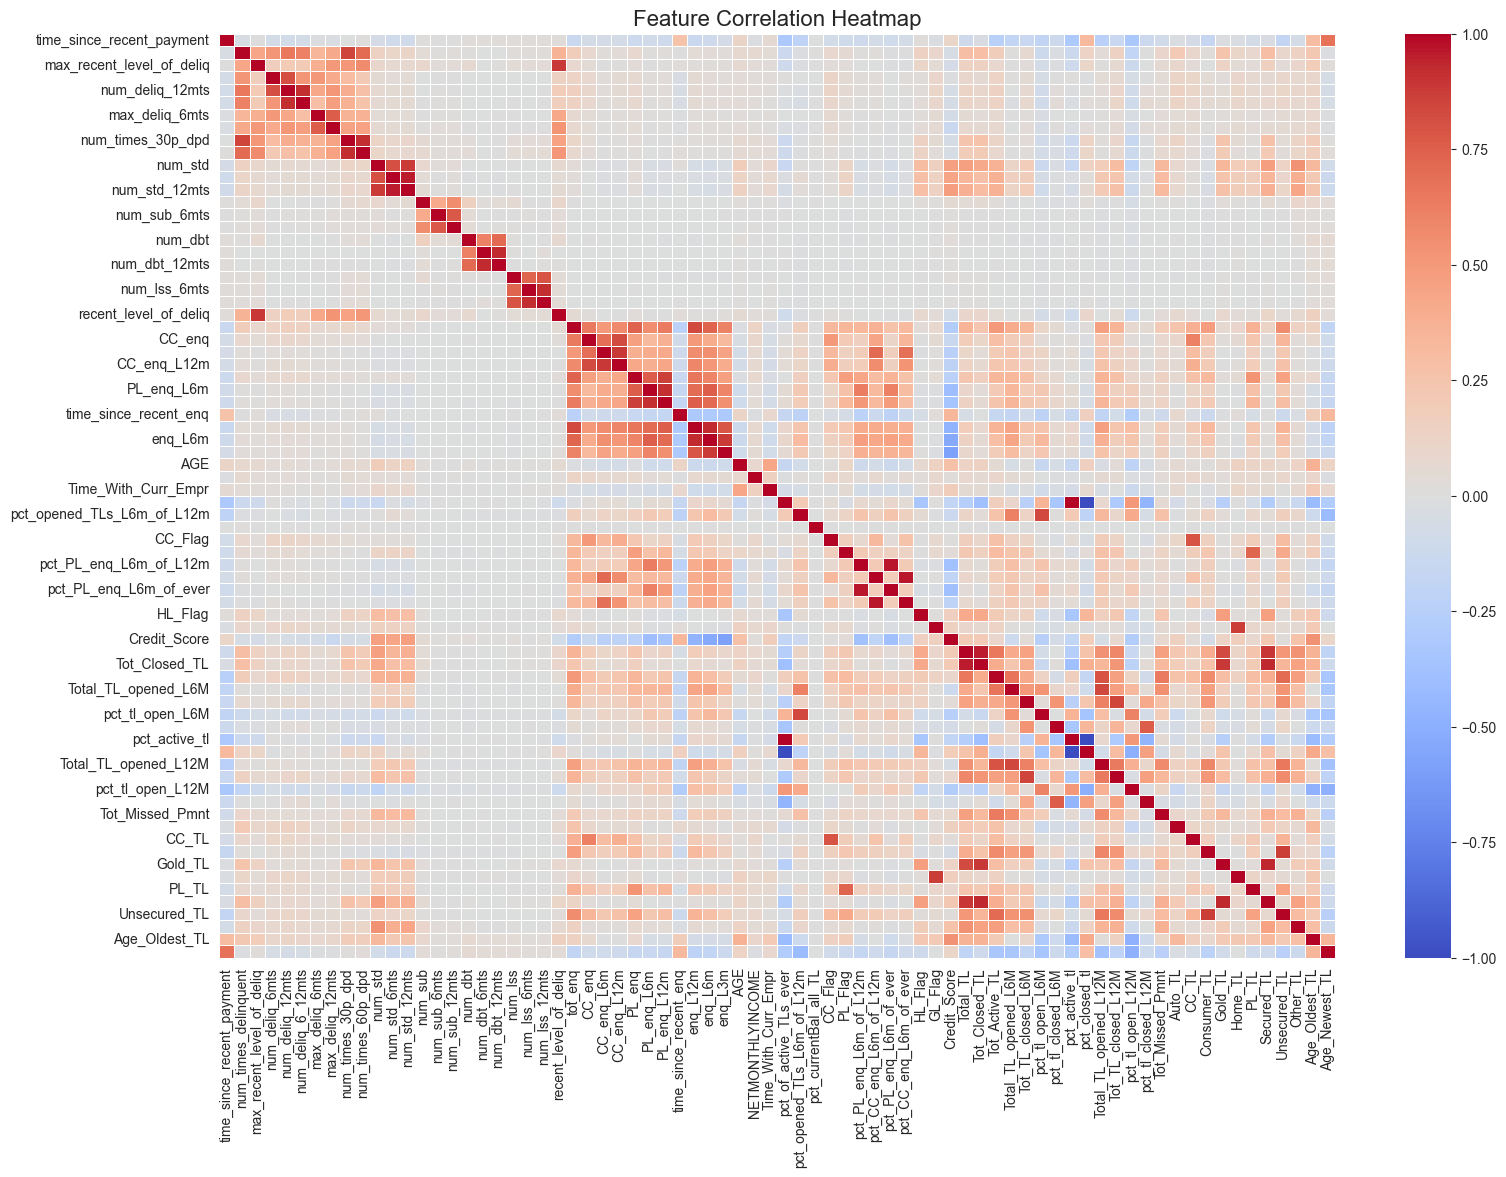

In [35]:
# Set figure size for better readability
plt.figure(figsize=(18, 12))

# Compute the correlation matrix
correlation_matrix = merged_df5.corr(numeric_only=True)

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [36]:
# Identify categorical and numerical columns
categorical_cols = ['MARITALSTATUS', 'EDUCATION', 'GENDER','last_prod_enq2','first_prod_enq2']
numerical_cols = [col for col in merged_df5.columns if col not in categorical_cols + [target_col]]

In [37]:
# One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(merged_df5[categorical_cols])
categorical_encoded = pd.DataFrame(ohe.transform(merged_df5[categorical_cols]),
                                   columns=ohe.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical features
merged_df5_processed = pd.concat([merged_df5[numerical_cols].reset_index(drop=True), categorical_encoded], axis=1)

# Convert all columns to numeric
temp_cols = merged_df5_processed.columns
merged_df5_processed[temp_cols] = merged_df5_processed[temp_cols].apply(pd.to_numeric, errors='coerce')

# Remove low variance features
var_thresh = VarianceThreshold(threshold=0.05)
X_var = var_thresh.fit_transform(merged_df5_processed)

merged_df5_processed.drop(['Approved_Flag'], axis=1, inplace=True)
merged_df5_processed=pd.concat([merged_df5_processed, cs], axis=1)
merged_df5_processed

C:\Users\Yatharth_Shivam\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,Credit_Score
0,549.0,11,29,0,0,0,0.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,696
1,47.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,685
2,302.0,9,25,1,9,8,25.0,25.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,693
3,74.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,673
4,583.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,650
51332,57.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,702
51333,32.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,661
51334,58.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,686


In [38]:

# Splitting data
X = merged_df5_processed.drop(columns=['Credit_Score'])
y = merged_df5_processed[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
k_best = SelectKBest(score_func=f_regression, k=min(50, X_train_scaled.shape[1]))
X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = k_best.transform(X_test_scaled)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=min(35, X_train_k_best.shape[1]))
X_train_rfe = rfe.fit_transform(X_train_k_best, y_train)
X_test_rfe = rfe.transform(X_test_k_best)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=50000),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=10000, solver='adam', random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    trained_models[name] = model

# Evaluate models
metrics = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append([name, r2, mse, mae])

metrics_df = pd.DataFrame(metrics, columns=["Model", "R2 Score", "MSE", "MAE"])
print(metrics_df)


                   Model  R2 Score        MSE       MAE
0      Linear Regression  0.796241  85.231051  7.205844
1       Ridge Regression  0.796240  85.231322  7.205859
2       Lasso Regression  0.794535  85.944479  7.233333
3  ElasticNet Regression  0.790905  87.462994  7.298743
4         Neural Network  0.874099  52.663720  5.992213


USING OHE, StandardScaler,  RFE, SELECTKBEST AND MODELS (REGRESSION) (MERGED DATASET IS USED) (STARTING FROM SCRATCH)(REMOVING MULTICOLLINEARITY ) (FIXED HYPER PARAMS)

In [39]:
merged_df2

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [40]:
# Identify target variable and features
target_col = 'Credit_Score'
merged_df2.replace(-99999, np.nan, inplace=True)
merged_df2.dropna(thresh=0.65 * len(merged_df2), axis=1, inplace=True)

# Fill missing values manually
for col in merged_df2.columns:
    if merged_df2[col].dtype == 'object':
        merged_df2[col].fillna(merged_df2[col].mode()[0], inplace=True)
    else:
        merged_df2[col].fillna(merged_df2[col].median(), inplace=True)
merged_df2

C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_1968\2790715184.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df2[col].fillna(merged_df2[col].median(), inplace=True)
C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_1968\2790715184.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,11,29,0,0,0,0.0,0.0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,0,0,0,0,0,0.0,0.0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,9,25,1,9,8,25.0,25.0,0,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,74.0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,0,0,0,0,0,0.0,0.0,0,...,0,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15.0,2,24,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,3,1,24.0,5.0
51332,51333,57.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,2,2,0,74.0,7.0
51333,51334,32.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,2,0,9.0,5.0
51334,51335,58.0,0,0,0,0,0,0.0,0.0,0,...,0,2,0,0,0,0,2,0,15.0,8.0


In [41]:
merged_df2.drop(['PROSPECTID'],axis=1,inplace=True)
merged_df2

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,549.0,11,29,0,0,0,0.0,0.0,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,47.0,0,0,0,0,0,0.0,0.0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,302.0,9,25,1,9,8,25.0,25.0,0,0,...,0,6,1,0,0,2,6,0,47.0,2.0
3,74.0,0,0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,583.0,0,0,0,0,0,0.0,0.0,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,3,1,24.0,5.0
51332,57.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,2,2,0,74.0,7.0
51333,32.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,2,0,9.0,5.0
51334,58.0,0,0,0,0,0,0.0,0.0,0,0,...,0,2,0,0,0,0,2,0,15.0,8.0


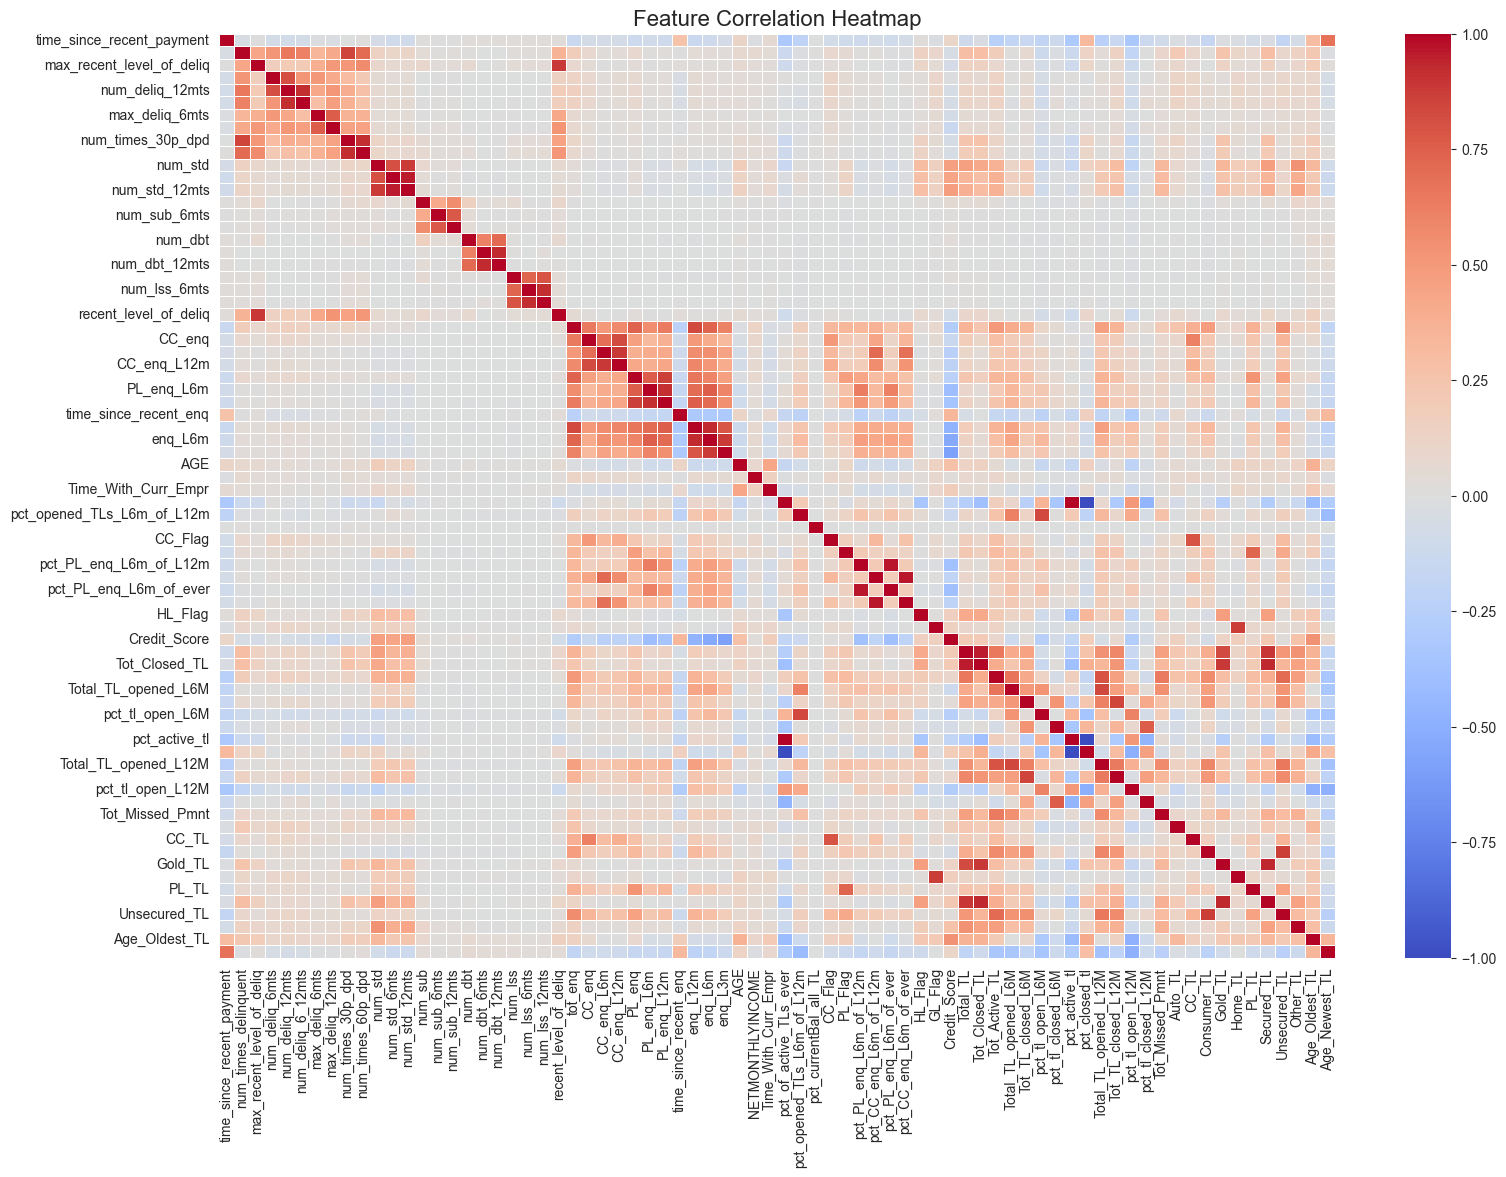

In [42]:
# Set figure size for better readability
plt.figure(figsize=(18, 12))

# Compute the correlation matrix
correlation_matrix = merged_df2.corr(numeric_only=True)

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Title for the heatmap
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [43]:
# One-Hot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
ohe.fit(merged_df2[categorical_cols])
categorical_encoded = pd.DataFrame(ohe.transform(merged_df2[categorical_cols]),
                                   columns=ohe.get_feature_names_out(categorical_cols))

# Combine numerical and encoded categorical features
merged_df2_processed = pd.concat([merged_df5[numerical_cols].reset_index(drop=True), categorical_encoded], axis=1)

# Convert all columns to numeric
temp_cols = merged_df2_processed.columns
merged_df2_processed[temp_cols] = merged_df2_processed[temp_cols].apply(pd.to_numeric, errors='coerce')

# Remove low variance features
var_thresh = VarianceThreshold(threshold=0.05)
X_var = var_thresh.fit_transform(merged_df2_processed)

#merged_df2_processed.drop(['Approved_Flag'], axis=1, inplace=True)
merged_df2_processed=pd.concat([merged_df2_processed, cs], axis=1)

merged_df2_processed

C:\Users\Yatharth_Shivam\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\feature_selection\_variance_threshold.py:114: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,Credit_Score
0,549.0,11,29,0,0,0,0.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,696
1,47.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,685
2,302.0,9,25,1,9,8,25.0,25.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,693
3,74.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,673
4,583.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,650
51332,57.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,702
51333,32.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,661
51334,58.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,686


In [44]:
merged_df2_processed.drop(['Approved_Flag'], axis=1, inplace=True)

In [45]:
# Convert back to DataFrame after VarianceThreshold
X_var_df = pd.DataFrame(X_var, columns=merged_df2_processed.columns[var_thresh.get_support()])

# Calculate VIF for all features
vif_data = pd.DataFrame()
vif_data["Feature"] = X_var_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_var_df.values, i) for i in range(X_var_df.shape[1])]

# Drop features with VIF > 10 (high multicollinearity)
selected_features = vif_data.loc[vif_data["VIF"] < 10, "Feature"]
X_vif = X_var_df[selected_features]

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_vif, merged_df5[target_col], test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection
k_best = SelectKBest(score_func=f_regression, k=min(50, X_train_scaled.shape[1]))
X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
X_test_k_best = k_best.transform(X_test_scaled)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=min(35, X_train_k_best.shape[1]))
X_train_rfe = rfe.fit_transform(X_train_k_best, y_train)
X_test_rfe = rfe.transform(X_test_k_best)

# Train models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=50000),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=10000, solver='adam', random_state=42)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    trained_models[name] = model

# Evaluate models
metrics = []
for name, model in trained_models.items():
    y_pred = model.predict(X_test_rfe)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append([name, r2, mse, mae])

metrics_df = pd.DataFrame(metrics, columns=["Model", "R2 Score", "MSE", "MAE"])
print(metrics_df)


C:\Users\Yatharth_Shivam\PycharmProjects\PythonProject\.venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                   Model  R2 Score         MSE       MAE
0      Linear Regression  0.762308   99.424921  7.715689
1       Ridge Regression  0.762308   99.424932  7.715693
2       Lasso Regression  0.760465  100.195886  7.754698
3  ElasticNet Regression  0.758559  100.993134  7.787676
4         Neural Network  0.828855   71.588916  6.665801


USING OHE, StandardScaler,RFE, SELECTKBEST AND MODELS (REGRESSION) (MERGED_DF2_PROCESSED DATASET IS USED) (STARTING FROM SCRATCH)(LOW VARIANCE REMOVED ) (REMOVED MULTICOLLINEARITY ) (CHANGING HYPER PARAMS)

In [46]:
merged_df2_processed

,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,...,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others,Credit_Score
0,549.0,11,29,0,0,0,0.0,0.0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,696
1,47.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,685
2,302.0,9,25,1,9,8,25.0,25.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,693
3,74.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,673
4,583.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,2,24,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,650
51332,57.0,0,0,0,0,0,0.0,0.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,702
51333,32.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,661
51334,58.0,0,0,0,0,0,0.0,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,686


In [52]:
# Iterative Feature Selection and Hyperparameter Tuning
best_k = None
best_r2 = -np.inf
best_model = None

for k in [30, 40 ,50 ,60 ]:
    k_best = SelectKBest(score_func=f_regression, k=min(k, X_train_scaled.shape[1]))
    X_train_k_best = k_best.fit_transform(X_train_scaled, y_train)
    X_test_k_best = k_best.transform(X_test_scaled)

    for n_features in [25, 35 ,45,55 ]:
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=min(n_features, X_train_k_best.shape[1]))
        X_train_rfe = rfe.fit_transform(X_train_k_best, y_train)
        X_test_rfe = rfe.transform(X_test_k_best)

        models = {
            "Linear Regression": LinearRegression(),
            "Ridge Regression": Ridge(),
            "Lasso Regression": Lasso(),
            "ElasticNet Regression": ElasticNet(),
            "Neural Network": MLPRegressor(random_state=42)
        }

        param_grid = {
            "Ridge Regression": {'alpha': [0.01, 0.1, 1.0]},
            "Lasso Regression": {'alpha': [0.001, 0.01, 0.1], 'max_iter': [5000]},
            "ElasticNet Regression": {'alpha': [0.001, 0.01, 0.1], 'l1_ratio': [0.1, 0.5], 'max_iter': [20000]},
            "Neural Network": {'hidden_layer_sizes': [(32, 16), (64, 32)], 'max_iter': [5000], 'solver': ['adam']}
        }

        for name, model in models.items():
            if name in param_grid:
                grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='r2', n_jobs=-1)
                grid_search.fit(X_train_rfe, y_train)
                model = grid_search.best_estimator_
            else:
                model.fit(X_train_rfe, y_train)

            y_pred = model.predict(X_test_rfe)
            r2 = r2_score(y_test, y_pred)

            if r2 > best_r2:
                best_r2 = r2
                best_k = k
                best_model = model

print(f"Best model found: {best_model} with k={best_k} and R2={best_r2}")


Best model found: MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=5000, random_state=42) with k=50 and R2=0.848713906361017


USING OHE, StandardScaler,PCA AND MODELS (Linear Regression (LinearRegression)
Decision Tree Regressor (DecisionTreeRegressor)
Random Forest Regressor (RandomForestRegressor)
Gradient Boosting Regressor (GradientBoostingRegressor)
Support Vector Regressor (SVR)
K-Nearest Neighbors Regressor (KNeighborsRegressor) ) (MERGED_DF4 DATASET IS USED) (STARTING FROM SCRATCH)(REMOVING LOW VARIANCE ) (CHANGING HYPER PARAMS)

In [14]:
merged_df4

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [ ]:
# Handle missing values (-99999 as NaN, drop cols with >35% missing)
merged_df4.replace(-99999, np.nan, inplace=True)
# Fill remaining NaN values
for col in merged_df4.columns:
    if merged_df4[col].dtype == 'object':
        merged_df4[col].fillna(merged_df4[col].mode()[0], inplace=True)
    else:
        merged_df4[col].fillna(merged_df4[col].median(), inplace=True)




--- Linear Regression ---
Cross-Validation R² Score: 0.57
MAE: 9.77
MSE: 180.59
RMSE: 13.44
R² Score: 0.57


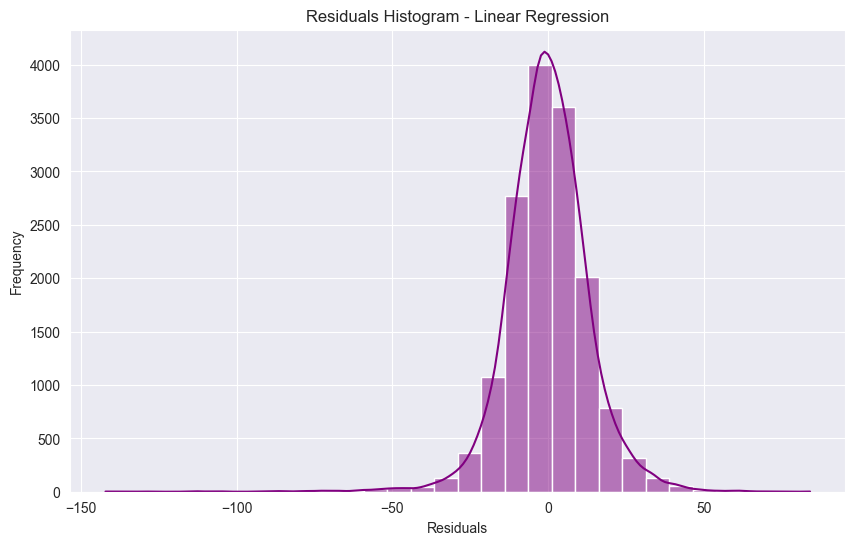

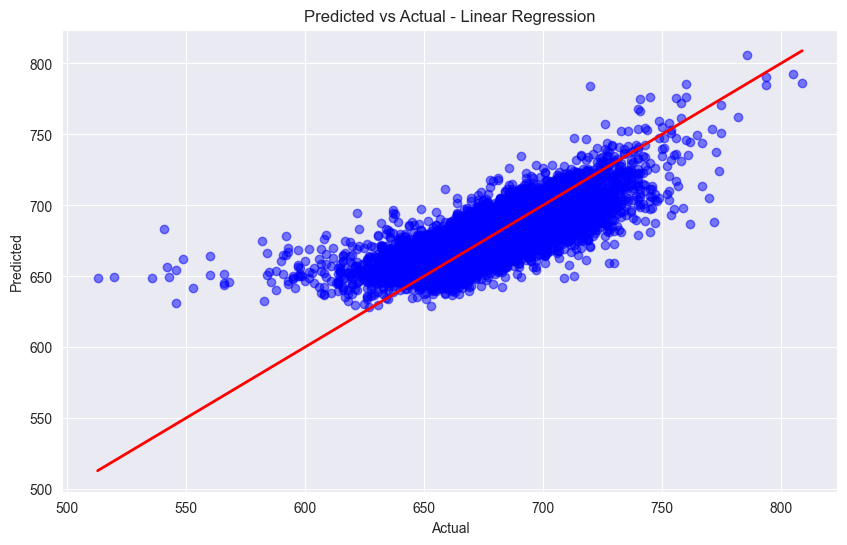


--- Decision Tree Regressor ---
Cross-Validation R² Score: 0.13
MAE: 13.38
MSE: 361.06
RMSE: 19.00
R² Score: 0.14


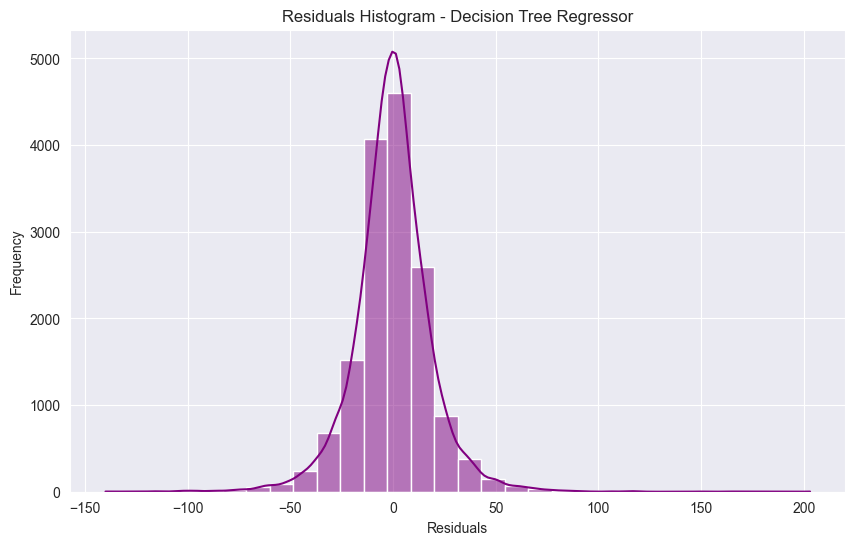

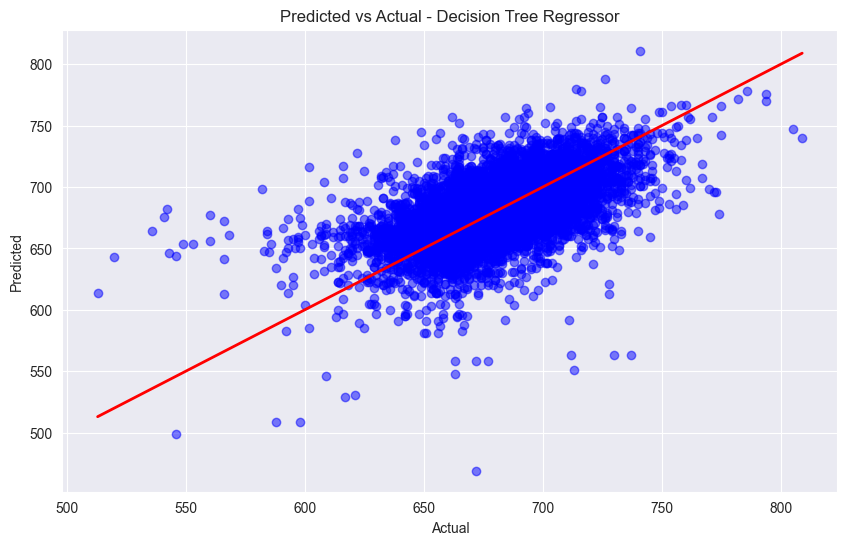


--- Random Forest Regressor ---
Cross-Validation R² Score: 0.61
MAE: 9.07
MSE: 165.68
RMSE: 12.87
R² Score: 0.60


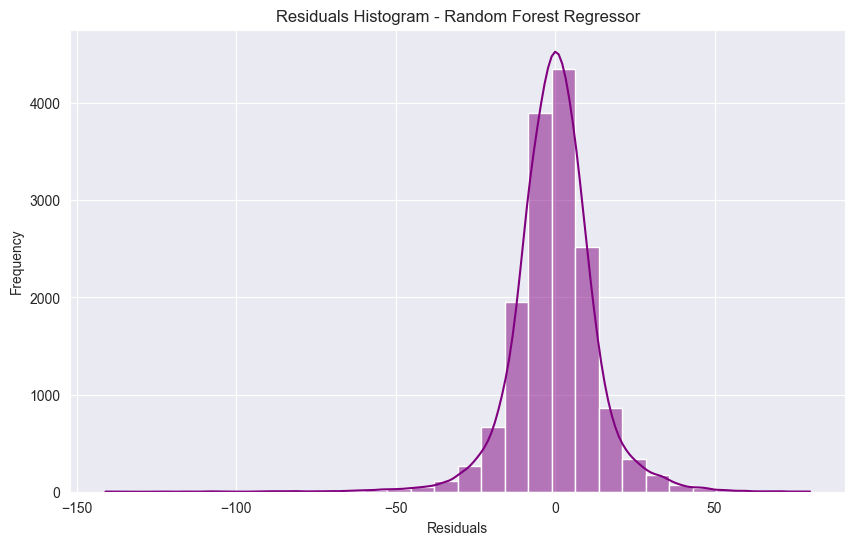

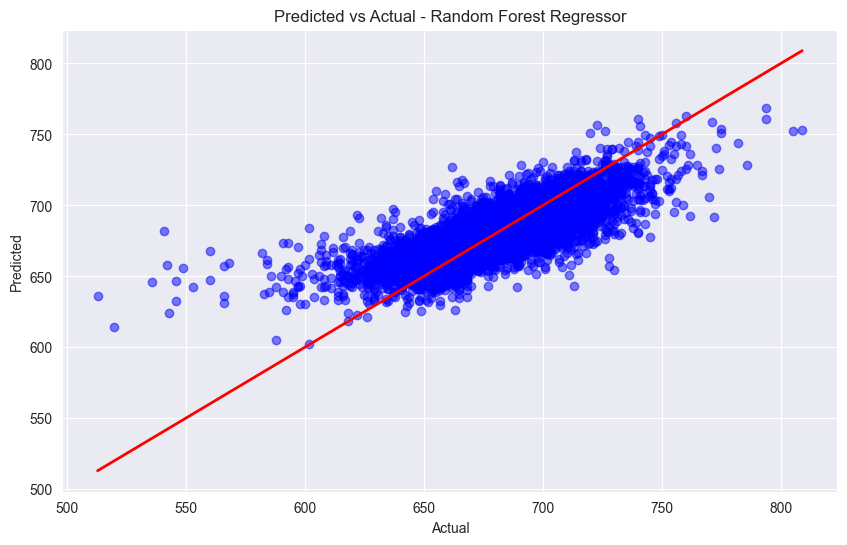


--- Gradient Boosting Regressor ---
Cross-Validation R² Score: 0.57
MAE: 9.66
MSE: 181.29
RMSE: 13.46
R² Score: 0.57


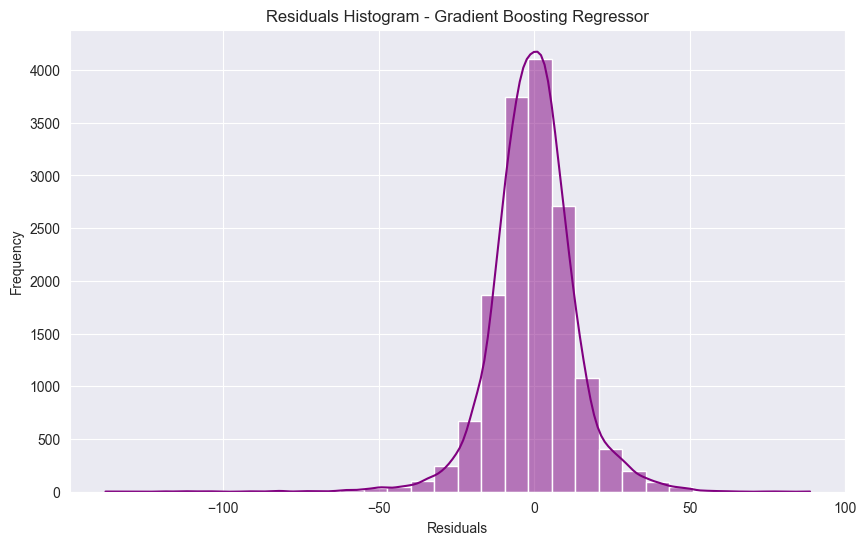

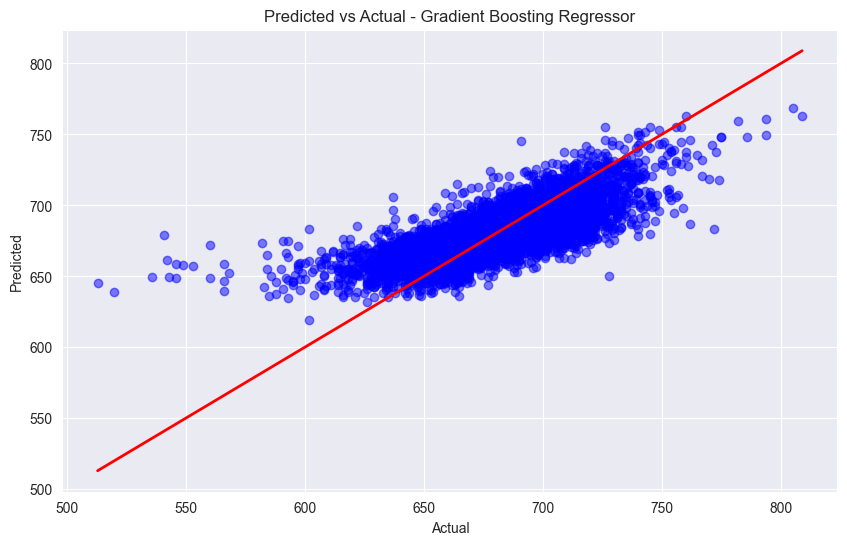


--- Support Vector Regressor ---
Cross-Validation R² Score: 0.54
MAE: 9.57
MSE: 189.81
RMSE: 13.78
R² Score: 0.55


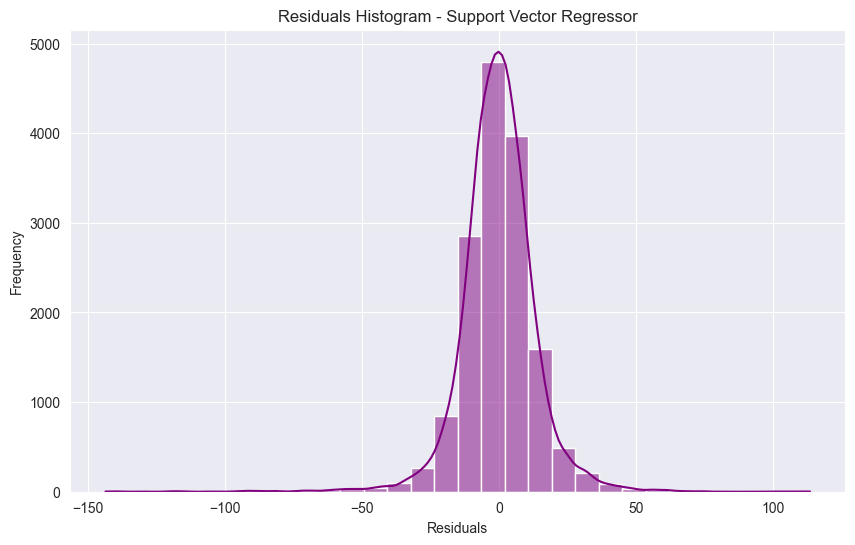

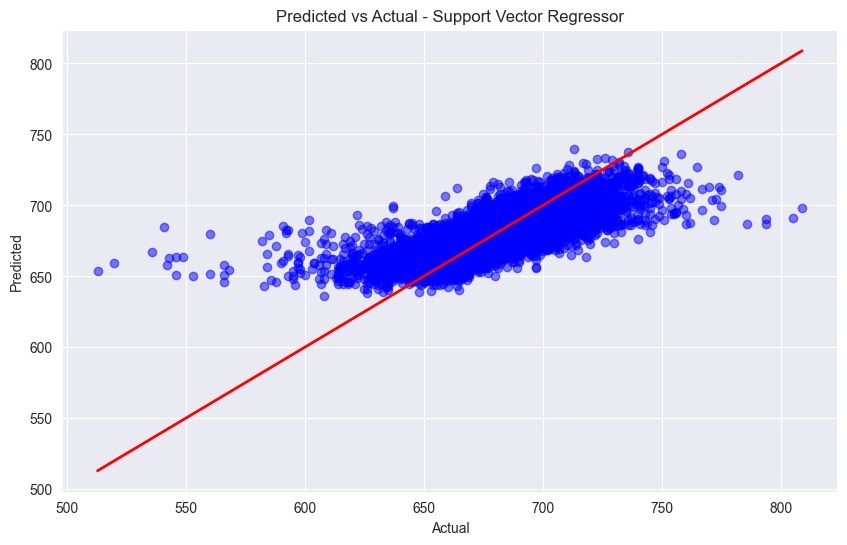


--- K-Nearest Neighbors Regressor ---
Cross-Validation R² Score: 0.50
MAE: 10.56
MSE: 210.39
RMSE: 14.50
R² Score: 0.50


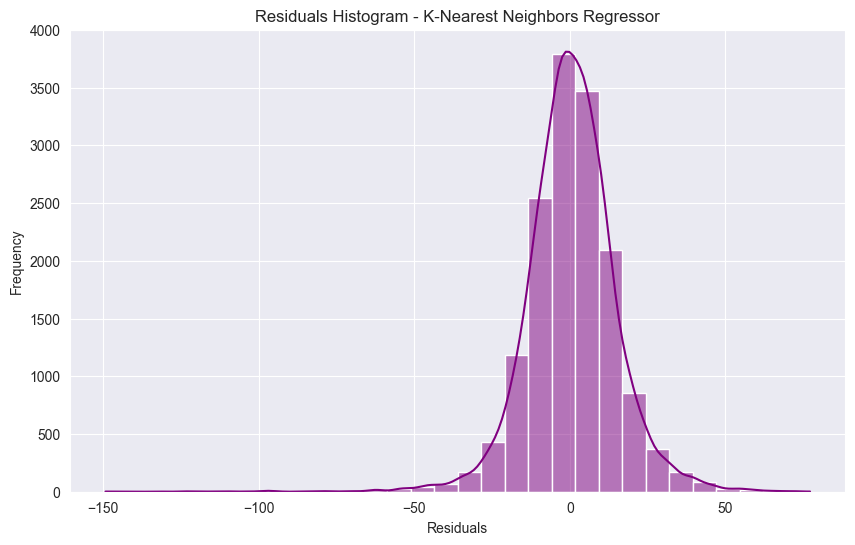

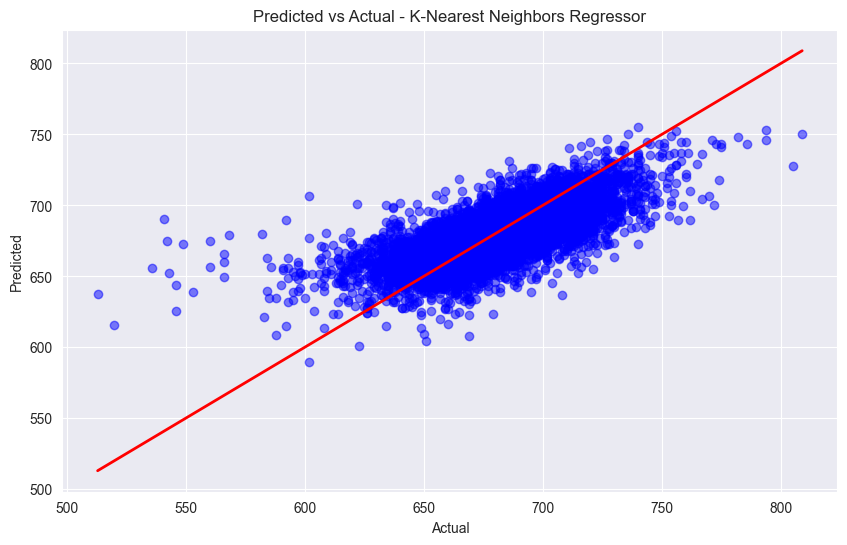

In [15]:

# Drop columns with all missing values
merged_df4.dropna(axis=1, how='all', inplace=True)

# Identify categorical and numerical features
categorical_cols = merged_df4.select_dtypes(include=['object']).columns
numerical_cols = merged_df4.select_dtypes(include=[np.number]).columns.drop('Credit_Score')

# Set target variable and features
target = 'Credit_Score'
X = merged_df4.drop(columns=[target])
y = merged_df4[target]

# One-Hot Encoding and Standardization using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply One-Hot Encoding and Standardization
X_encoded = preprocessor.fit_transform(X)

# Remove low variance features
selector = VarianceThreshold(threshold=0.05)
X_var = selector.fit_transform(X_encoded)

# Split the dataset before PCA
X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size=0.3, random_state=42)

# Apply PCA after Train-Test Split
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Dictionary of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor()
}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_pca, y_train, cv=5, scoring='r2')
    print(f"Cross-Validation R² Score: {np.mean(cv_scores):.2f}")

    # Train and predict
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True, color='purple')
    plt.title(f'Residuals Histogram - {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    # Predicted vs Actual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f'Predicted vs Actual - {model_name}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()


USING OHE, StandardScaler,Feature Selection using Mutual Information , RFE AND MODELS (Linear Regression (LinearRegression)
Decision Tree Regressor (DecisionTreeRegressor)
Random Forest Regressor (RandomForestRegressor)
Gradient Boosting Regressor (GradientBoostingRegressor)
Support Vector Regressor (SVR)
K-Nearest Neighbors Regressor (KNeighborsRegressor) ) (merged_df6 DATASET IS USED) (STARTING FROM SCRATCH)(REMOVING LOW VARIANCE ) (CHANGING HYPER PARAMS)

In [11]:
merged_df6

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [22]:
# Handle missing values (-99999 as NaN, drop cols with >35% missing)
merged_df6.replace(-99999, np.nan, inplace=True)

for col in merged_df6.columns:
    if merged_df6[col].dtype == 'object':
        merged_df6[col].fillna(merged_df6[col].mode()[0], inplace=True)
    else:
        merged_df6[col].fillna(merged_df6[col].median(), inplace=True)



C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_2944\3887465148.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df1[col].fillna(merged_df1[col].median(), inplace=True)
C:\Users\Yatharth_Shivam\AppData\Local\Temp\ipykernel_2944\3887465148.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [23]:
merged_df6

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549.0,35.0,15.0,11,29.0,29,0,0,0,...,0,0,1,0,4,1,4,0,72.0,18.0
1,2,47.0,21.0,10.0,0,33.0,0,0,0,0,...,0,1,0,0,0,0,1,0,7.0,7.0
2,3,302.0,11.0,3.0,9,25.0,25,1,9,8,...,0,6,1,0,0,2,6,0,47.0,2.0
3,4,74.0,21.0,10.0,0,33.0,0,0,0,0,...,0,0,0,0,0,0,1,1,5.0,5.0
4,5,583.0,21.0,10.0,0,33.0,0,0,0,0,...,0,0,0,0,0,3,0,2,131.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15.0,24.0,23.0,2,24.0,24,0,0,0,...,0,2,0,0,0,0,3,1,24.0,5.0
51332,51333,57.0,21.0,10.0,0,33.0,0,0,0,0,...,0,2,0,0,0,2,2,0,74.0,7.0
51333,51334,32.0,21.0,10.0,0,33.0,0,0,0,0,...,0,2,0,0,0,0,2,0,9.0,5.0
51334,51335,58.0,21.0,10.0,0,33.0,0,0,0,0,...,0,2,0,0,0,0,2,0,15.0,8.0


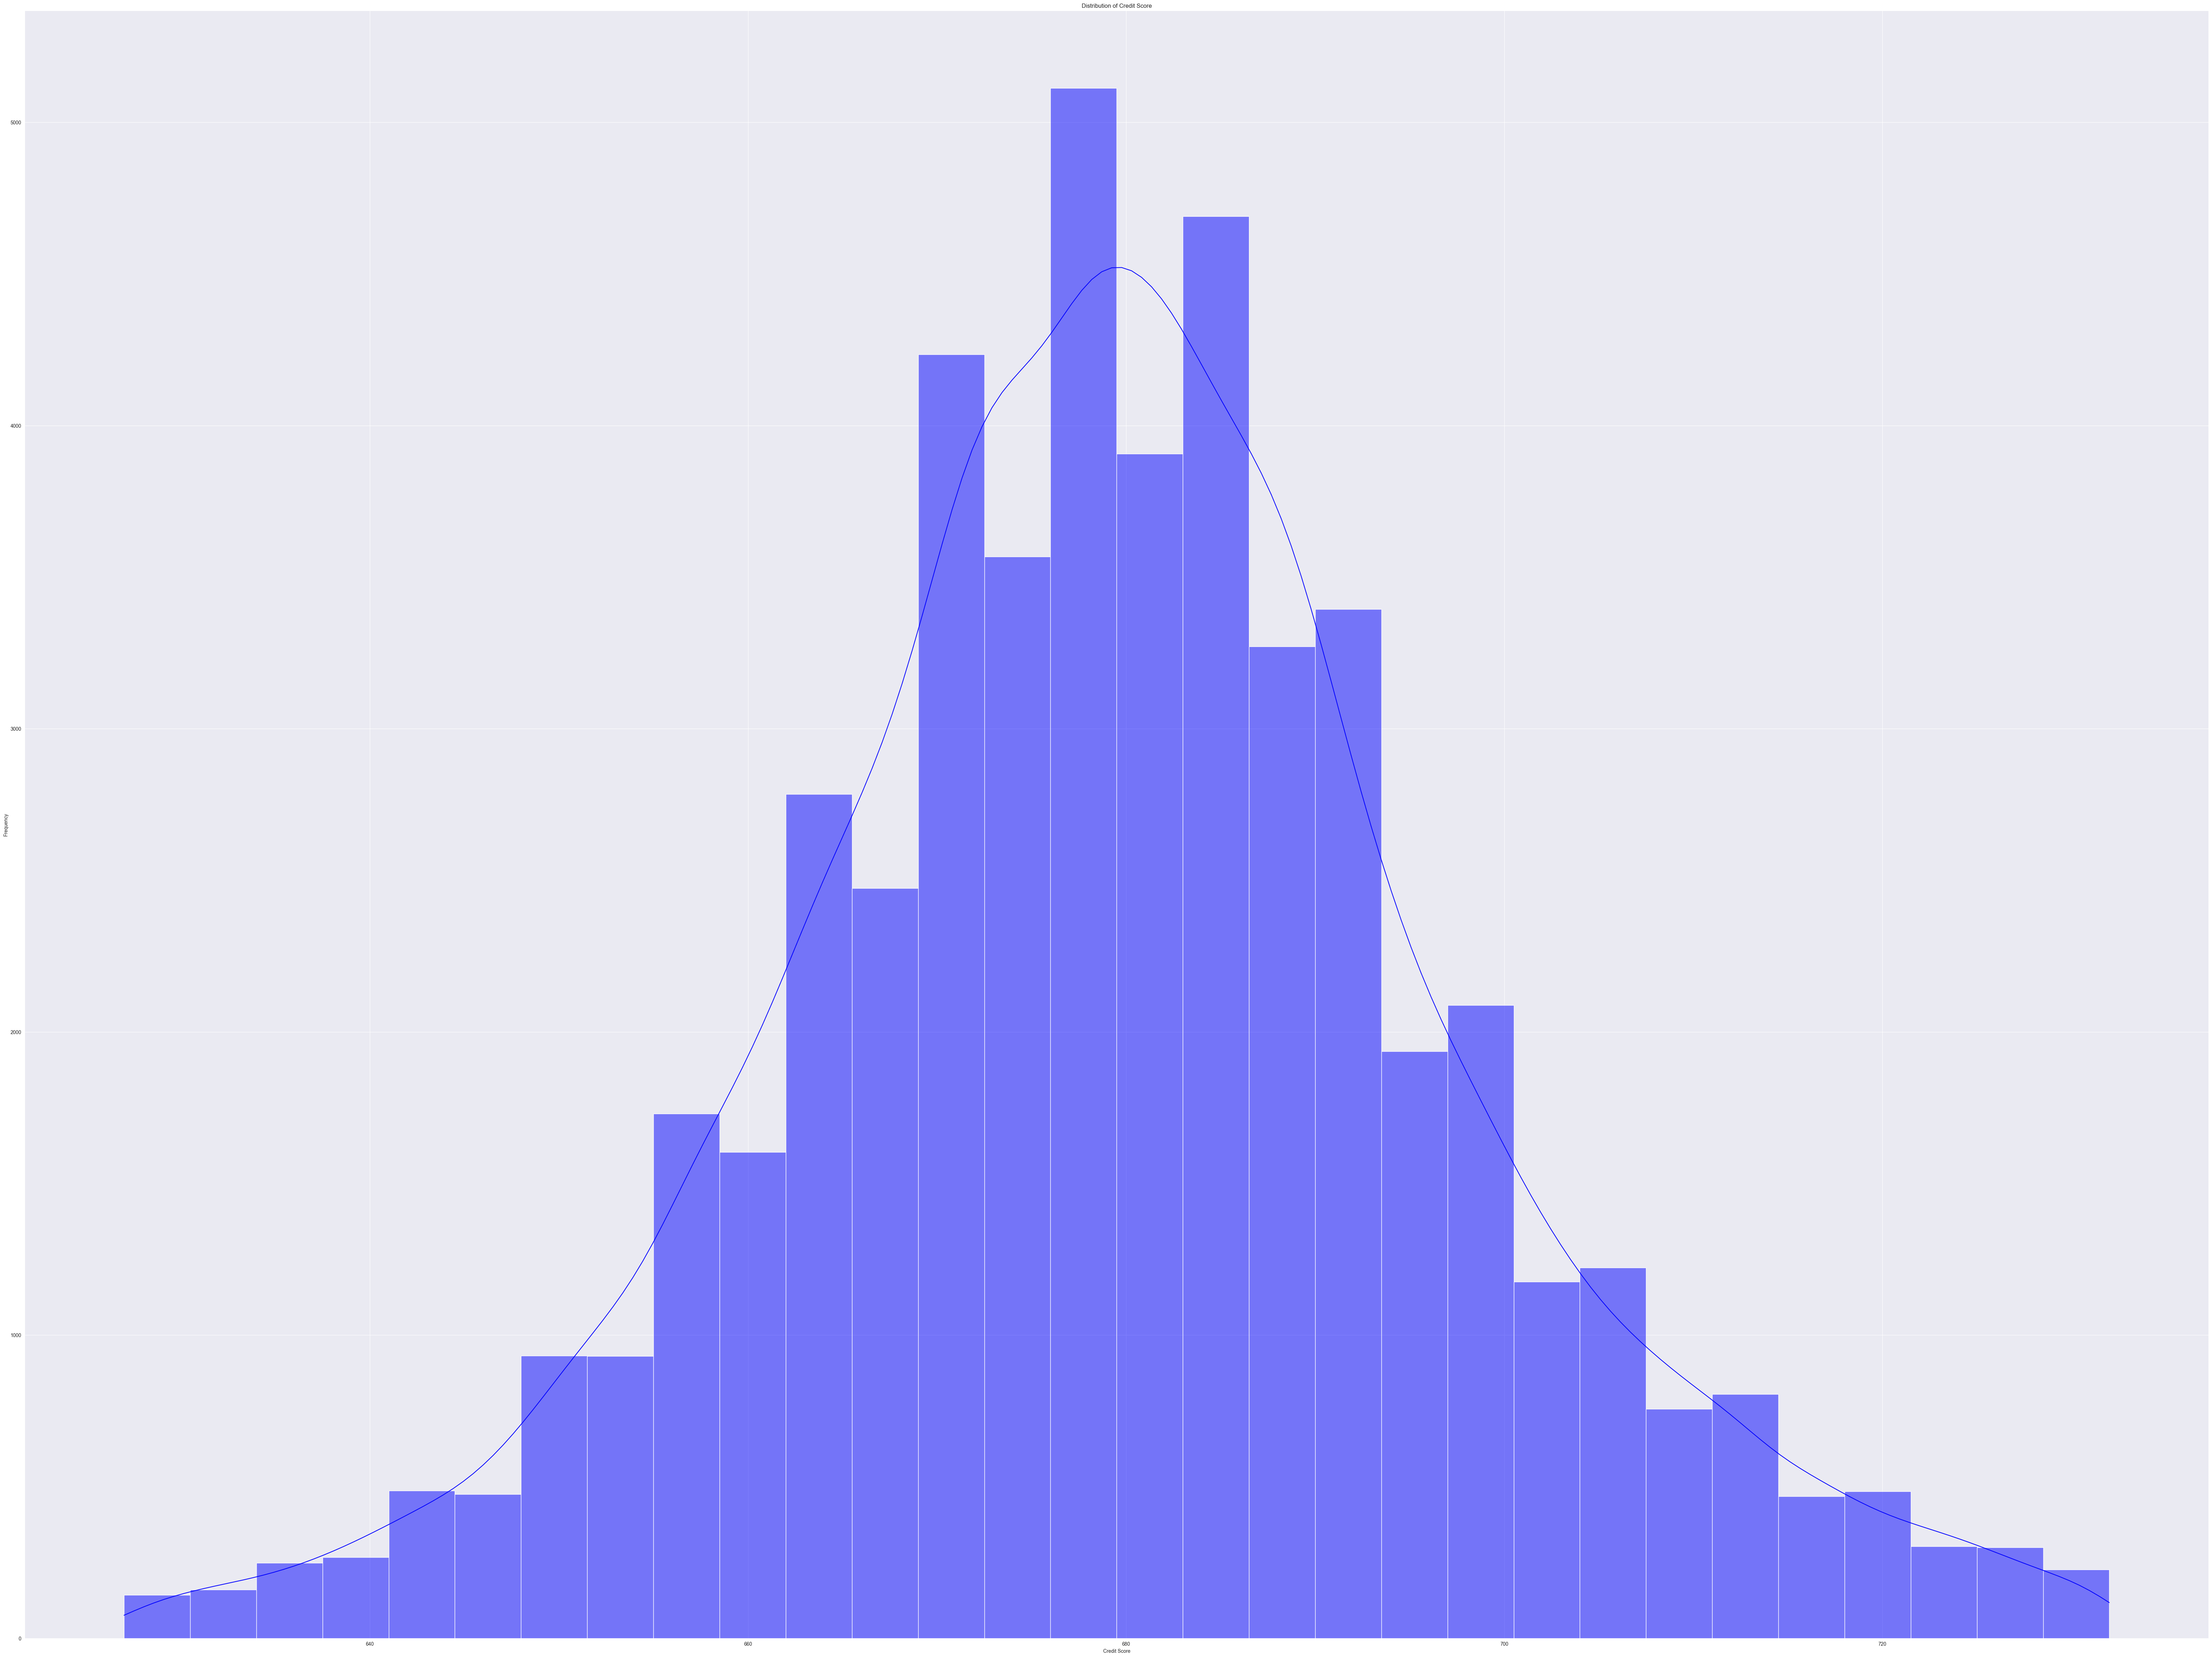

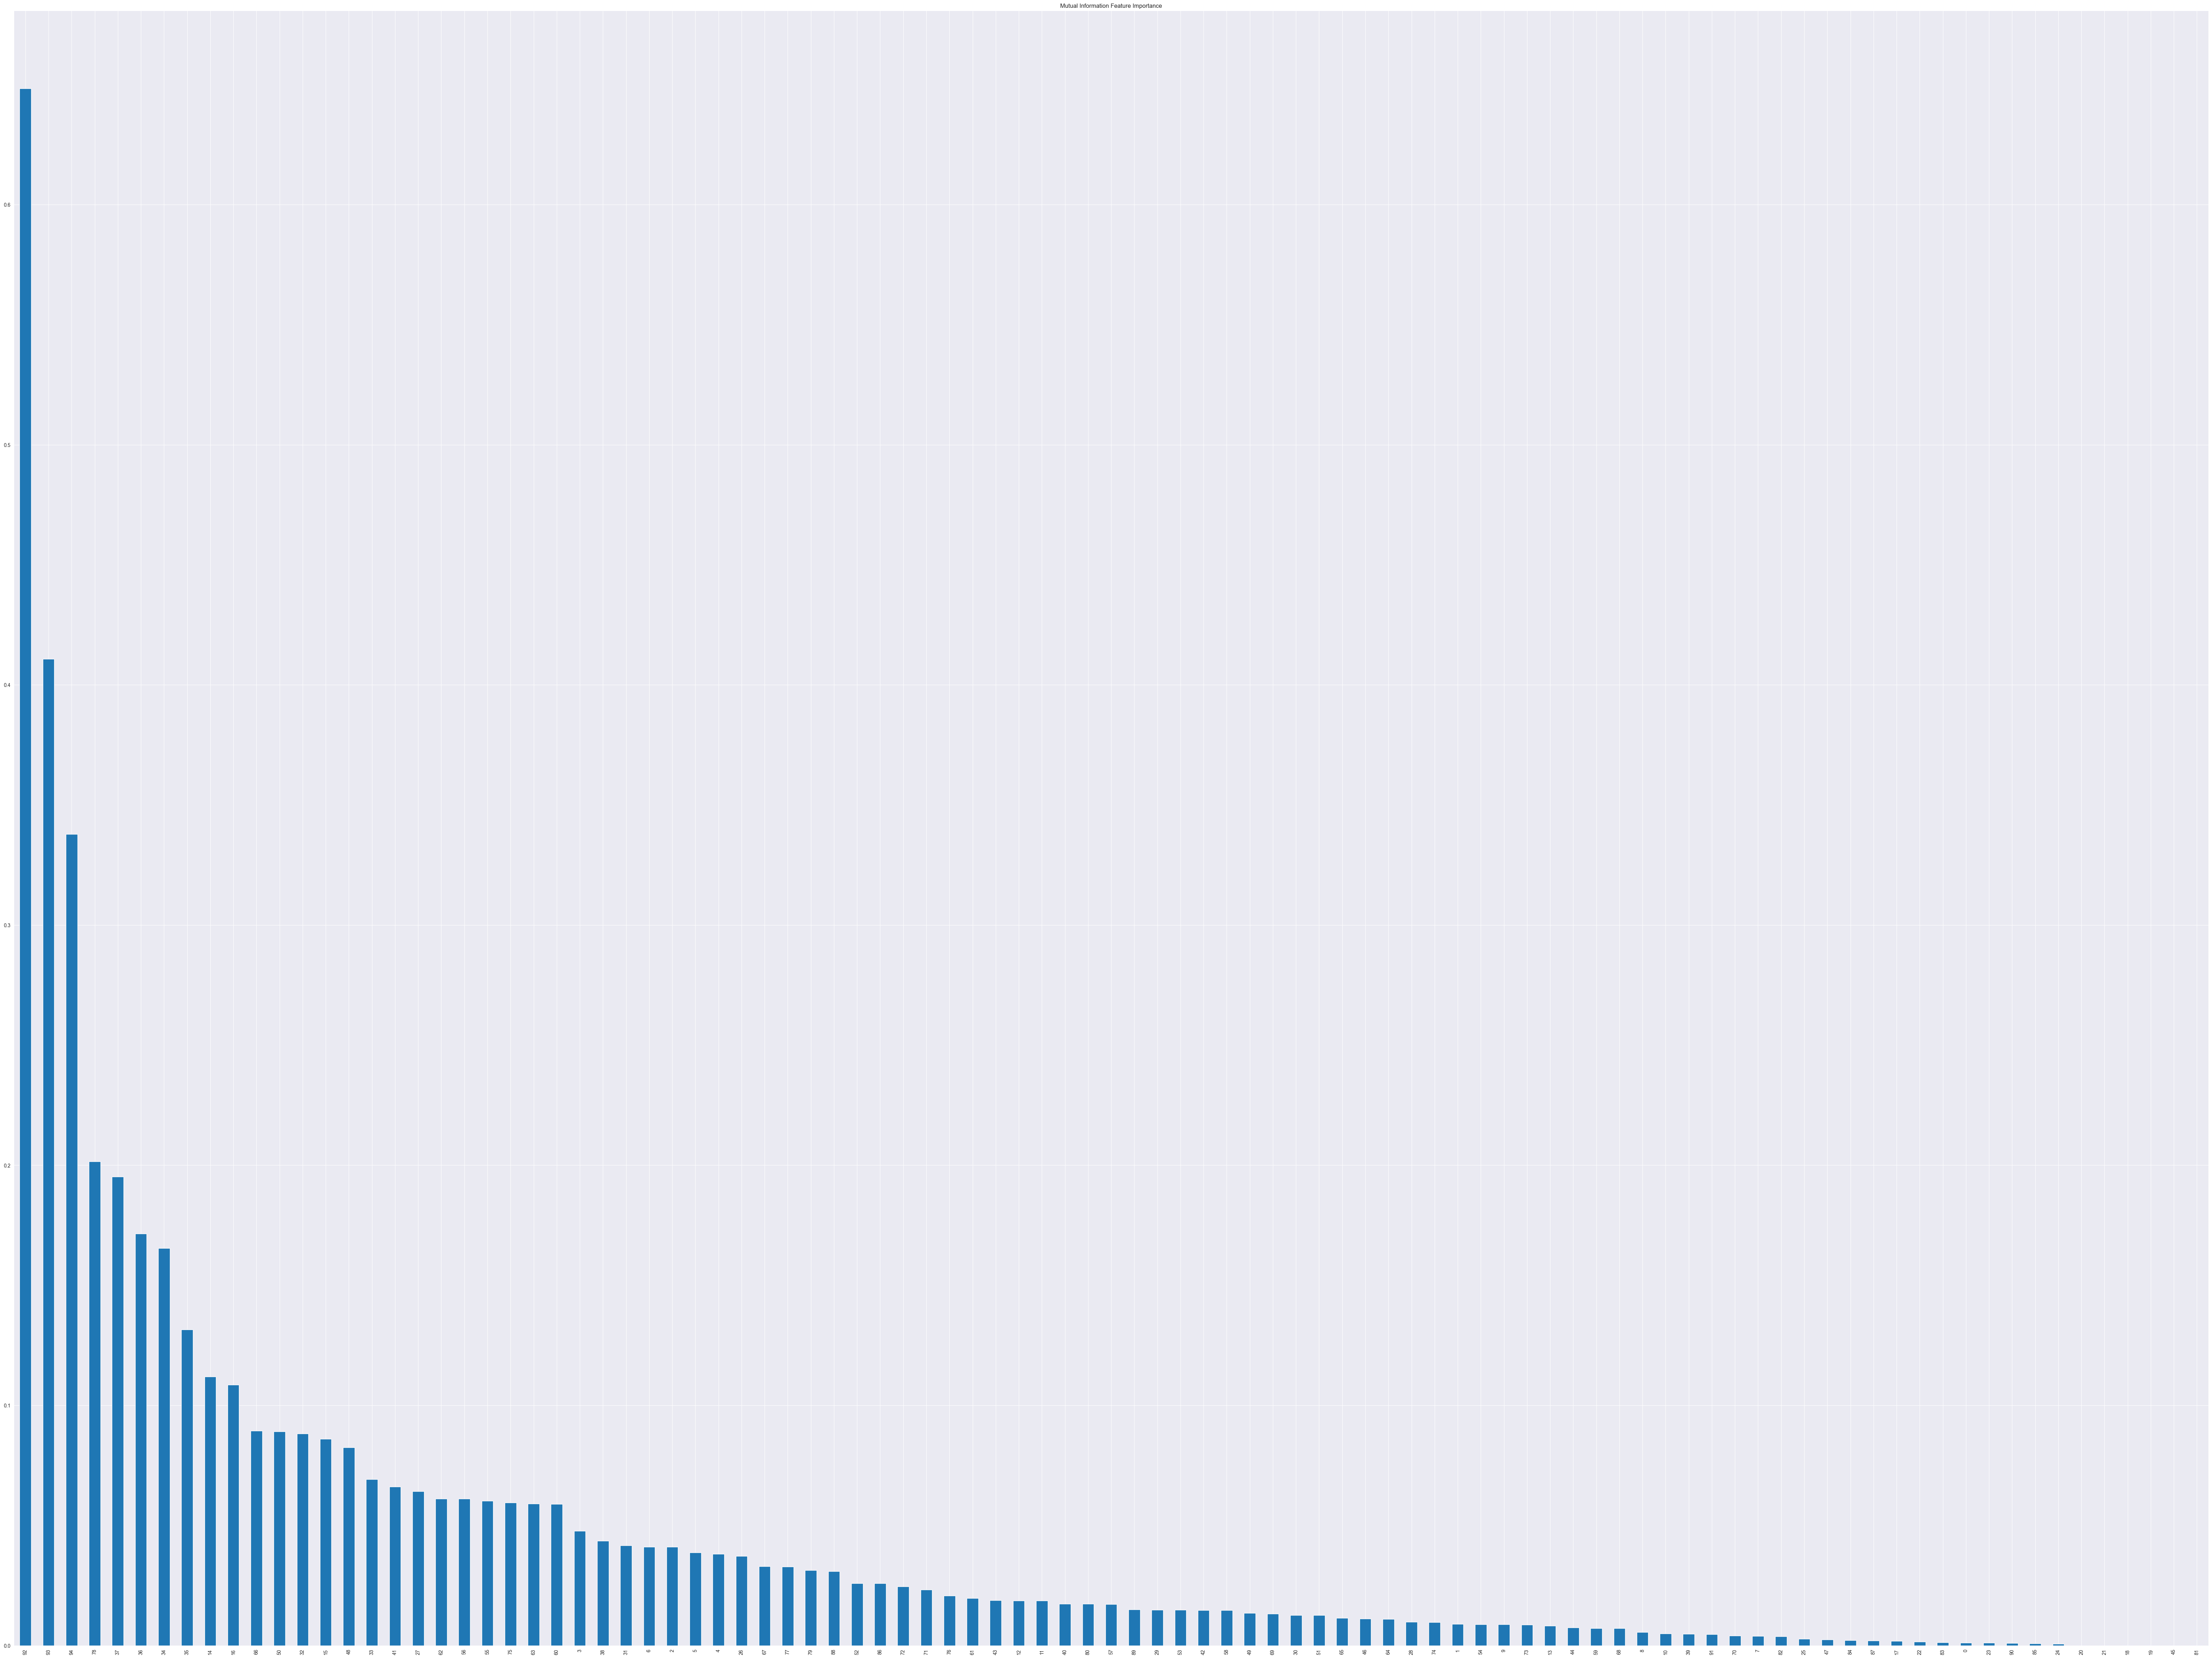


--- Linear Regression ---
MAE: 4.58
MSE: 32.25
RMSE: 5.68
R² Score: 0.90
Adjusted R² Score: 0.90
MAPE: 0.01

--- Decision Tree ---
MAE: 5.75
MSE: 57.67
RMSE: 7.59
R² Score: 0.82
Adjusted R² Score: 0.82
MAPE: 0.01

--- Random Forest ---


KeyboardInterrupt: 

In [54]:
from scipy.stats import zscore
# Drop columns with all missing values
merged_df6.dropna(axis=1, how='all', inplace=True)

# Identify categorical and numerical features
categorical_cols = merged_df6.select_dtypes(include=['object']).columns
numerical_cols = merged_df6.select_dtypes(include=[np.number]).columns.drop('Credit_Score')

# Set target variable and features
target = 'Credit_Score'
X = merged_df6.drop(columns=[target])
y = merged_df6[target]

# Outlier Detection and Removal using Z-Score
y_zscore = zscore(y)
merged_df6 = merged_df6[(np.abs(y_zscore) < 3)]
X = merged_df6.drop(columns=[target])
y = merged_df6[target]

# Data Distribution Analysis
plt.figure(figsize=(25,15))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Log Transformation if skewed
if np.abs(y.skew()) > 1:
    y = np.log1p(y)

# One-Hot Encoding and Standardization using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Apply One-Hot Encoding and Standardization
X_encoded = preprocessor.fit_transform(X)

# Remove low variance features
selector = VarianceThreshold(threshold=0.05)
X_var = selector.fit_transform(X_encoded)

# Feature Selection using Mutual Information
plt.figure(figsize=(25,15))
mi_scores = mutual_info_regression(X_var, y)
mi_features = pd.Series(mi_scores).sort_values(ascending=False)
mi_features.plot(kind='bar', title='Mutual Information Feature Importance')
plt.show()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_var, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination (RFE) with Linear Regression as base
base_model = LinearRegression()
rfe = RFE(base_model, n_features_to_select=35)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Dictionary of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),

}

# Hyperparameter Tuning
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2]},

}

# Model Evaluation
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    if model_name in param_grid:
        search = RandomizedSearchCV(model, param_grid[model_name], n_iter=3, cv=3, scoring='r2', random_state=42)
        search.fit(X_train_rfe, y_train)
        model = search.best_estimator_

    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # Reverse log transformation if applied
    if np.abs(y.skew()) > 1:
        y_test = np.expm1(y_test)
        y_pred = np.expm1(y_pred)

    # Evaluation Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test_rfe.shape[1]-1)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Adjusted R² Score: {adj_r2:.2f}")
    print(f"MAPE: {mape:.2f}")



USING OHE, StandardScaler ,SELECTKBEST , RFE AND MODELS (Linear Regression (LinearRegression)
Decision Tree Regressor (DecisionTreeRegressor)
Random Forest Regressor (RandomForestRegressor)
Gradient Boosting Regressor (GradientBoostingRegressor)
XGBOOST ,EXTRATREE , GRADIENTBOOST , HISTBOOST) ) (merged_df6 DATASET IS USED) (STARTING FROM SCRATCH) (CHANGING HYPER PARAMS)

In [6]:
merged_df6

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,549,35,15,11,29,29,0,0,0,...,0,0,1,0,4,1,4,0,72,18
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,3,302,11,3,9,25,25,1,9,8,...,0,6,1,0,0,2,6,0,47,2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,0,1,1,5,5
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [7]:
merged_df6.drop(['PROSPECTID'],axis=1, inplace=True)

merged_df6

,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,549,35,15,11,29,29,0,0,0,-99999,...,0,0,1,0,4,1,4,0,72,18
1,47,-99999,-99999,0,-99999,0,0,0,0,0,...,0,1,0,0,0,0,1,0,7,7
2,302,11,3,9,25,25,1,9,8,25,...,0,6,1,0,0,2,6,0,47,2
3,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,...,0,0,0,0,0,0,1,1,5,5
4,583,-99999,-99999,0,-99999,0,0,0,0,-99999,...,0,0,0,0,0,3,0,2,131,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15,24,23,2,24,24,0,0,0,0,...,0,2,0,0,0,0,3,1,24,5
51332,57,-99999,-99999,0,-99999,0,0,0,0,0,...,0,2,0,0,0,2,2,0,74,7
51333,32,-99999,-99999,0,-99999,0,0,0,0,0,...,0,2,0,0,0,0,2,0,9,5
51334,58,-99999,-99999,0,-99999,0,0,0,0,0,...,0,2,0,0,0,0,2,0,15,8


In [8]:

# Replace -99999 with NaN
merged_df6.replace(-99999, np.nan, inplace=True)

# Separate features and target
X = merged_df6.drop(columns='Credit_Score')
y = merged_df6['Credit_Score']

# Identify numerical and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

# Advanced Models and Hyperparameters
models = {
    'LinearRegression': (LinearRegression(), {}),
    'Ridge': (Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(), {'regressor__alpha': [0.01, 0.1, 1.0]}),
    'ElasticNet': (ElasticNet(), {'regressor__alpha': [0.01, 0.1, 1.0]}),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), {'regressor__max_depth': [3, 5, 7]}),
    'ExtraTree': (ExtraTreeRegressor(random_state=42), {'regressor__max_depth': [3, 5, 7]}),
    'RandomForest': (RandomForestRegressor(random_state=42), {'regressor__n_estimators': [100, 200]}),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), {'regressor__learning_rate': [0.01, 0.1]}),
    'HistGradientBoosting': (HistGradientBoostingRegressor(random_state=42), {'regressor__learning_rate': [0.01, 0.1]}),
    'XGBoost': (XGBRegressor(random_state=42), {'regressor__learning_rate': [0.01, 0.1]}),
}

# Adding Voting Regressor for ensemble
voting_reg = VotingRegressor(estimators=[
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
])

models['VotingRegressor'] = (voting_reg, {})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model with SelectKBest and RFE
results = {}
for name, (model, params) in models.items():
    # SelectKBest
    select_k = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_regression, k=25)),
        ('regressor', model)
    ])
    gs_k = GridSearchCV(select_k, param_grid=params, cv=3, n_jobs=-1, scoring='r2')
    gs_k.fit(X_train, y_train)
    y_pred_k = gs_k.predict(X_test)
    rmse_k = np.sqrt(mean_squared_error(y_test, y_pred_k))
    r2_k = r2_score(y_test, y_pred_k)
    
    # RFE
    rfe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=LinearRegression(), n_features_to_select=10)),
        ('regressor', model)
    ])
    gs_rfe = GridSearchCV(rfe, param_grid=params, cv=3, n_jobs=-1, scoring='r2')
    gs_rfe.fit(X_train, y_train)
    y_pred_rfe = gs_rfe.predict(X_test)
    rmse_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    r2_rfe = r2_score(y_test, y_pred_rfe)
    
    # Store results
    results[name] = {
        'SelectKBest_RMSE': rmse_k, 
        'SelectKBest_R2': r2_k,
        'RFE_RMSE': rmse_rfe,
        'RFE_R2': r2_rfe,
        'Best_Params_SelectKBest': gs_k.best_params_,
        'Best_Params_RFE': gs_rfe.best_params_
    }

# Display results
results_df = pd.DataFrame(results).T
results_df.sort_values(by='SelectKBest_R2', ascending=False, inplace=True)
print(results_df)


                     SelectKBest_RMSE SelectKBest_R2  RFE_RMSE    RFE_R2  \
XGBoost                      7.954877       0.848718  5.731986  0.921453   
VotingRegressor              7.990633       0.847355   5.75315  0.920872   
HistGradientBoosting         7.993859       0.847232  5.799015  0.919605   
GradientBoosting             8.037753        0.84555  6.123688  0.910351   
RandomForest                  8.42881       0.830155  6.124805  0.910318   
DecisionTree                 8.524026       0.826296  7.247853  0.874415   
LinearRegression             8.717303        0.81833  6.954132  0.884387   
Ridge                        8.717305        0.81833  6.954179  0.884386   
Lasso                        8.718516       0.818279  6.955608  0.884338   
ElasticNet                   8.738399       0.817449  6.979294  0.883549   
ExtraTree                    9.553108       0.781823    8.2098  0.838867   

                                Best_Params_SelectKBest  \
XGBoost               {'regr